In [1]:
# importing required packages

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import IPython
import csv
import pandas as pd

import matplotlib #scientific plots
import matplotlib.pyplot as plt

import numpy as np # numerical programming

import sklearn #scikit-learn
import math #Mathematical functions
import pylab 
import time
import pprint as pp
from mpl_toolkits.mplot3d import Axes3D #we use this to plot 3d
from matplotlib.ticker import NullFormatter #No labels on the ticks.
from IPython.display import Image
from __future__ import division

Now we will import the data. Here I am using pandas to import data and I will aslo display some data.

In [2]:
#number of rows and columns to display
#pd.options.display.max_rows = 400
#pd.options.display.max_columns = 30
#reading data from csv file using pandas
collected_data = pd.read_csv('SFE Data.csv', delimiter =',',index_col = None, header = 0)
#collected_data.shape #to check the size of data
collected_data.head(2) #gives two values of columns



,C,N,P,S,V,Ni,Nb,Al,Ti,Fe,...,Cr,Cu,DOI,url,SFE,Error,title,Author,temperature,experiment_type
0,0.004,0.003,0.025,0.001,0.0,15.6,0.0,0.0,0.0,64.317,...,17.5,0.0,10.1007/s11661-013-1943-0,http://link.springer.com/article/10.1007/s1166...,51.6,0.014341,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300,TEM - WBDF
1,0.020,0.009,0.022,0.001,0.0,15.6,0.0,0.0,0.0,64.188,...,17.6,0.0,10.1007/s11661-013-1943-0,http://link.springer.com/article/10.1007/s1166...,54.6,0.023810,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300,TEM - WBDF


We are pre-processing the collected data.

In [3]:
#First we are reducing the collected data by considering the data which is done at room temperature 
#certain column selection name["1"] if twoname[["1",""]]
data_red1 = collected_data[(collected_data["temperature"]>290) & (collected_data["temperature"]<310)]
#data_roomtemp.shape
len(data_red1)

426

Now from room temperature data we will subset the data by considering experimental measurements 

In [4]:
data_red1["experiment_type"].unique()

array(['TEM - WBDF', 'XRD', 'TEM', 'Thermodynamic Modeling',
       'Synchrotron XRD', 'TEM-WBDF', 'Neutron Diffraction',
       'Literature Review', 'Literature review'], dtype=object)

In [5]:
data_red2=data_red1[(data_red1["experiment_type"]!="Thermodynamic Modeling")]
len(data_red2)

387

In [6]:
#dropping columns DOI and URL
#Alternative to specifying axis (labels, axis=1 is equivalent to columns=labels).
data_red2 = data_red2.drop(['DOI', 'url'], axis=1) 

data_red2.columns.values #display of column headers 

array(['C', 'N', 'P', 'S', 'V', 'Ni', 'Nb', 'Al', 'Ti', 'Fe', 'Hf', 'Mo',
       'Mn', 'Co', 'Si', 'Cr', 'Cu', 'SFE', 'Error', 'title', 'Author',
       'temperature', 'experiment_type'], dtype=object)

next only with ferrous alloys. the data from Unfried-Silgado, Jimy is only not ferrous alloys

In [7]:
data_red3=data_red2[(data_red2["Author"]!="Unfried-Silgado, Jimy")]
len(data_red3)

379

we are selecting only requried alloys because few alloys have very very less measurements.

In [8]:
alloys_header = data_red3[data_red3.columns[:17]]
#alloys_header.columns.values 

for i in alloys_header:
   print(i, len(alloys_header[alloys_header[i]> 0]) , len(alloys_header[alloys_header[i]> 0.05]))



C 339 98
N 248 85
P 170 7
S 170 1
V 0 0
Ni 300 300
Nb 2 2
Al 34 27
Ti 0 0
Fe 379 379
Hf 0 0
Mo 168 133
Mn 305 217
Co 3 3
Si 240 120
Cr 332 332
Cu 6 6


In [9]:
#if we check p s only few elements are more than 0.05 its due substantial alloying additions 
#and not because of impurity or trace additions. so this vcan be neglected
# we can also neglect v, ti, hf since there are zero. but we will display p,s, nb, co, cu to see if we can remove them
#alloys_header1 = ['P','S','Nb','Co','Cu']
alloys_header1 = alloys_header[['P','S','Nb','Co','Cu']]

for m in alloys_header1:
   print(m, alloys_header1[alloys_header1[m]> 0.05] )


P          P      S   Nb   Co   Cu
65   0.071  0.033  0.0  0.0  0.0
66   0.063  0.030  0.0  0.0  0.0
214  0.080  0.040  0.0  0.0  0.0
215  0.080  0.040  0.0  0.0  0.0
216  0.080  0.040  0.0  0.0  0.0
217  0.080  0.040  0.0  0.0  0.0
218  0.080  0.040  0.0  0.0  0.0
S          P     S   Nb   Co   Cu
156  0.012  0.06  0.0  0.0  0.0
Nb        P    S    Nb   Co   Cu
351  0.0  0.0  1.00  0.0  0.0
353  0.0  0.0  0.52  0.0  0.0
Co         P      S   Nb     Co   Cu
256  0.00  0.000  0.0   6.42  0.0
335  0.01  0.014  0.0  20.20  0.0
339  0.00  0.000  0.0   9.55  0.0
Cu        P    S   Nb   Co    Cu
117  0.0  0.0  0.0  0.0  0.23
132  0.0  0.0  0.0  0.0  0.23
237  0.0  0.0  0.0  0.0  0.37
238  0.0  0.0  0.0  0.0  0.22
239  0.0  0.0  0.0  0.0  0.14
257  0.0  0.0  0.0  0.0  5.20


the next is subset of data_red3 which have enough datapoints from 9 chosen elements

In [10]:
data_red4 = data_red3[(data_red3.Nb< 1) & (data_red3.Co< 1) & (data_red3.Cu< 1)]
len(data_red4)

374

In next data set, we will have drop values which do not have enough data points

In [11]:
data_red4 = data_red4.drop(['P','S',"V",'Nb','Co',"Ti","Hf",'Cu'], axis=1)
#print(data_red4.columns.values)
#len(data_red4.columns.values)
data_red4.shape

(374, 15)

we are converting the data into arrays, so we can work with numpy

In [12]:
#On applying the .reset_index() function, the index gets shifted to the dataframe as a separate column. It is named as index. 
#The new index of the dataframe is now integers ranging from 0 to the length of the dataframe.
first_array = data_red4.reset_index().values
print(first_array.shape)
first_array[0,:]
np.savetxt('data_want.csv', first_array[:,0:12], delimiter=',')


(374, 16)


In [13]:
SFE_data = first_array[:,0:12]
SFE_data = np.array(SFE_data, dtype='float')
#SFE-(1-error),each rows
lower = SFE_data[:,10]*(1 - SFE_data[:,11]) 
higher = SFE_data[:,10]*(1 + SFE_data[:,11])
lowhigh = np.column_stack((lower,higher))


In [14]:
SFE_data = np.column_stack((SFE_data,lowhigh))
print(SFE_data.shape)
print(SFE_data[0,:])

(374, 14)
[0.0000000e+00 4.0000000e-03 3.0000000e-03 1.5600000e+01 0.0000000e+00
 6.4317000e+01 2.5000000e+00 3.0000000e-02 2.0000000e-02 1.7500000e+01
 5.1600000e+01 1.4341085e-02 5.0860000e+01 5.2340000e+01]


now we will construct three ‘‘classes’’ of SFE ranges or three regimes and will map
all our SFE numerical data to categorical data.
High - SFE > 45 mJ/m2 - martensitic transformation of TRIP-like behavior
Medium -  - 20 mJ/m2 < SFE < 45 mJ/m2 - deformation twinning leading
Low - SFE< 20 mJ/m2 - deforms majorly by slip

In [15]:
SFE_classes = np.zeros(SFE_data.shape[0])

SFE_classes[SFE_data[:,10] <= 20] = 1
SFE_classes[(SFE_data[:,10] > 20) & (SFE_data[:,10] <= 45)] = 2
SFE_classes[(SFE_data[:,10] > 45)] = 3

#check number of entries for each class 
print((SFE_classes == 1).sum())
print((SFE_classes == 2).sum())
print((SFE_classes == 3).sum())

#check if only the needed classes there
print((SFE_classes == 1).sum() + (SFE_classes == 2).sum() + (SFE_classes == 3).sum()) 
SFE_classes.shape
SFE_data.shape


77
209
88
374


(374, 14)

Data Visualization

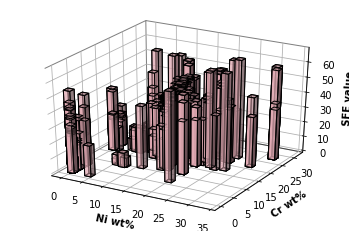

In [16]:
#now we will plot the data and see what we can visualize
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
Xpos=SFE_data[SFE_data[:,10]<70,3]
Ypos=SFE_data[SFE_data[:,10]<70,9]
Zpos=np.zeros(len(SFE_data[SFE_data[:,10]<70,10]))
dz=SFE_data[SFE_data[:,10]<70,10]
#print(len(Xpos))
#print(len(Ypos))
#ax.bar3d(x,y,z,dx,dy,dz,color, edgecolour, transpercy),breadth,width,height=vales of columns
ax.bar3d(Xpos,Ypos,Zpos,1.5,1.5,dz, edgecolor='black', color='pink', alpha=0.5)
#print(len(SFE_data[SFE_data[:,10]<70,10]))

ax.set_xlabel("Ni wt%", fontsize=10, fontweight='heavy')
#ax.set_xlim(35,0) # we can use this to show where x can with zero
# i choose the above limits after plotting image without limits and then adjusted axis
ax.set_ylabel("Cr wt%", fontsize=10, fontweight='heavy')
#ax.set_ylim(32,0)
ax.set_zlabel("SFE value", fontsize=10, fontweight='heavy')
#ax.set_zlim(0,60)
ax.xaxis.pane.set_edgecolor('black') #boders of axis, if not given it will be white
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.show()

above we took two elements(Ni and cr) and plotted. here we cannot decide anything just by SFE values, since it also depends on element values and each element have different values.
#increasing a certain element's value can lead to a certain behavior in SFE can't be applied.

Lets try to visualize each element with SFE

In [17]:
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [18]:
#we will plot variations of SFE values varying with different percentages
element_names = data_red4.columns.values[0:10]
print(element_names) #we are taking this because np array has no attribute 'columns'

['C' 'N' 'Ni' 'Al' 'Fe' 'Mo' 'Mn' 'Si' 'Cr' 'SFE']


<Figure size 360x360 with 0 Axes>

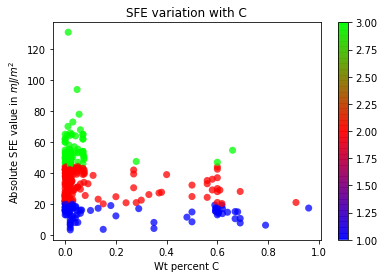

<Figure size 360x360 with 0 Axes>

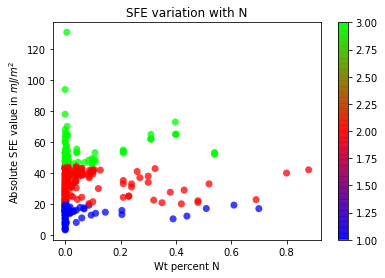

<Figure size 360x360 with 0 Axes>

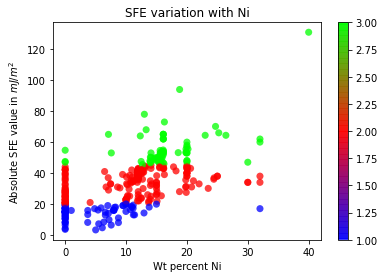

<Figure size 360x360 with 0 Axes>

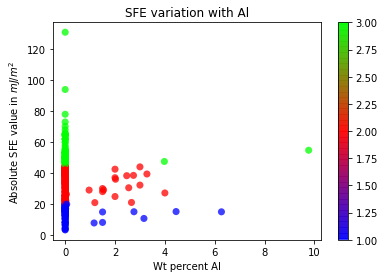

<Figure size 360x360 with 0 Axes>

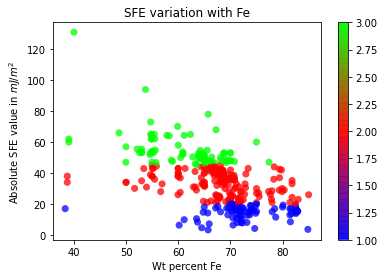

<Figure size 360x360 with 0 Axes>

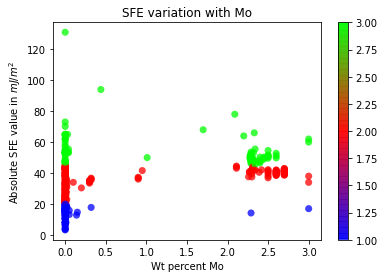

<Figure size 360x360 with 0 Axes>

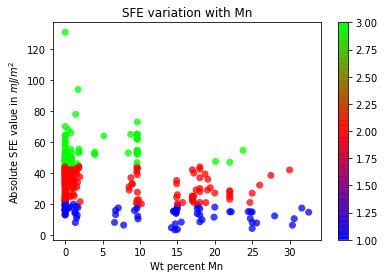

<Figure size 360x360 with 0 Axes>

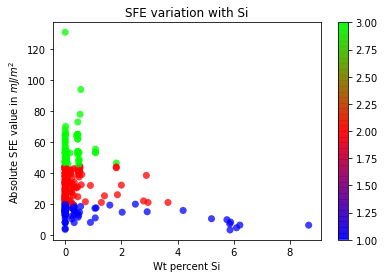

<Figure size 360x360 with 0 Axes>

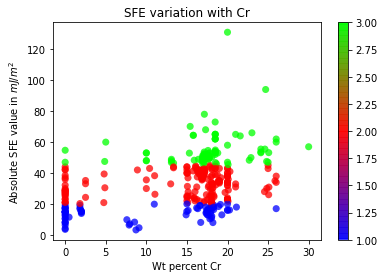

In [19]:
for i in range(1,10):
    fig = plt.figure(figsize=(5,5))
    fig, ax = plt.subplots()
    brg=ax.scatter(SFE_data[:,i],SFE_data[:,10],c=SFE_classes,marker="o", s=50, edgecolor='',cmap ='brg', alpha=0.75)
    ax.set_xlabel("Wt percent %s"%element_names[i-1])
    ax.set_ylabel("Absolute SFE value in $mJ/m^2$")
    ax.set_title("SFE variation with %s"%element_names[i-1])
    #print(SFE_data[:,1])
    #print(SFE_data[:,10])
    fig.colorbar(brg)
    plt.show()

We can see the plots are non-linear. Each SFE classes have different wt percentages of elements, dont have one proper sequence.

now we will see variation of one element with other elements

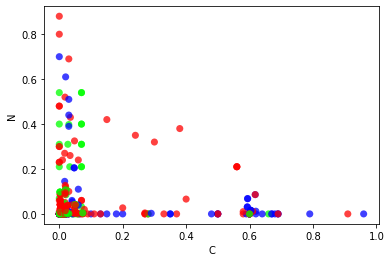

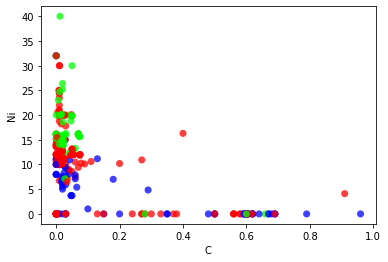

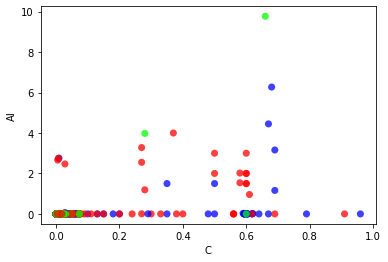

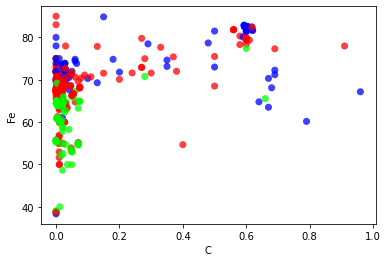

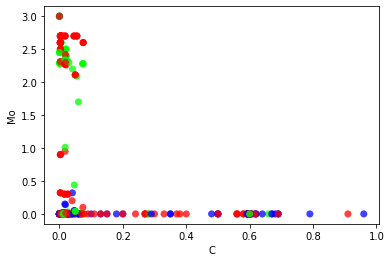

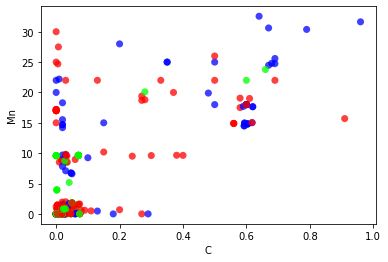

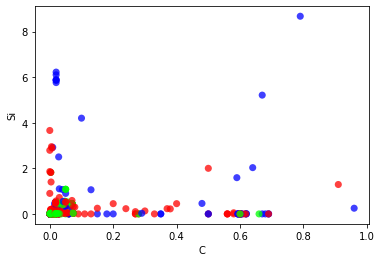

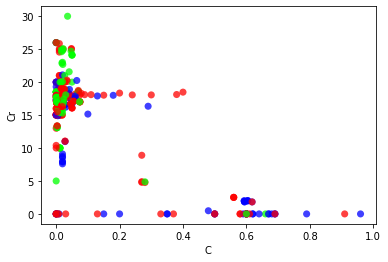

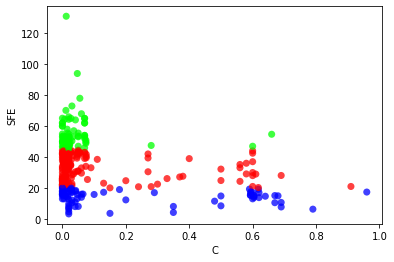

In [20]:
for i in range(2,11):
    #fig = plt.figure(figsize=(5,5))
    fig, ax = plt.subplots()
    ax.scatter(SFE_data[:,1],SFE_data[:,i],c=SFE_classes,marker="o", s=50, edgecolor='',cmap ='brg', alpha=0.75)
    ax.set_xlabel(element_names[0])
    ax.set_ylabel(element_names[i-1])
    #ax.set_title("SFE variation with %s"%element_names[i-1])
    #print(SFE_data[:,1])
    #print(SFE_data[:,10])
    plt.show()

There is no same sequence of C with other elements. 
The only thing we can observe is the high SFE classes are not present as C value increasing

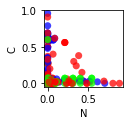

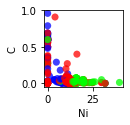

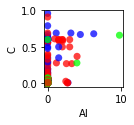

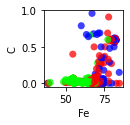

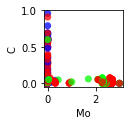

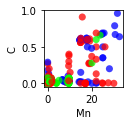

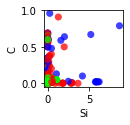

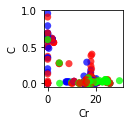

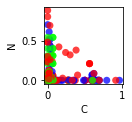

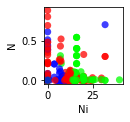

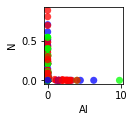

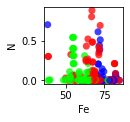

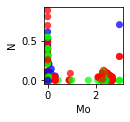

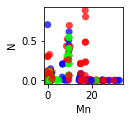

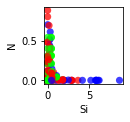

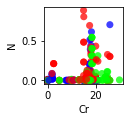

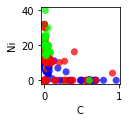

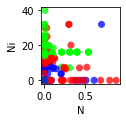

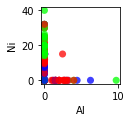

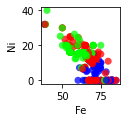

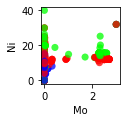

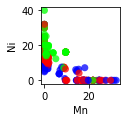

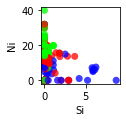

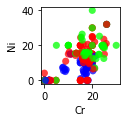

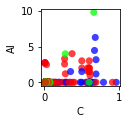

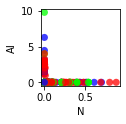

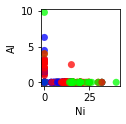

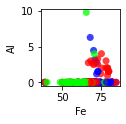

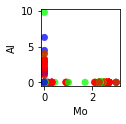

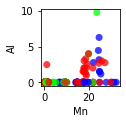

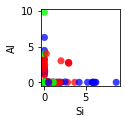

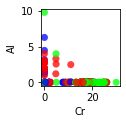

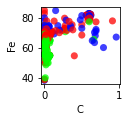

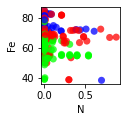

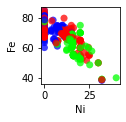

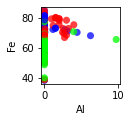

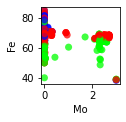

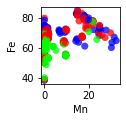

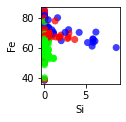

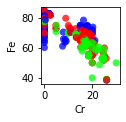

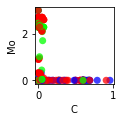

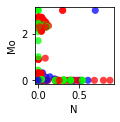

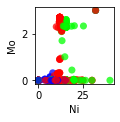

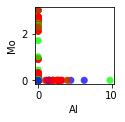

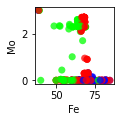

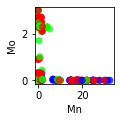

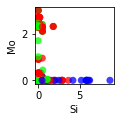

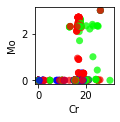

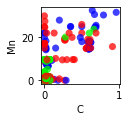

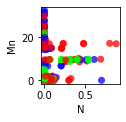

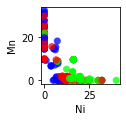

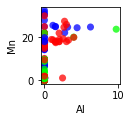

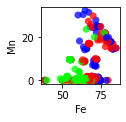

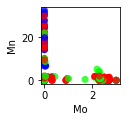

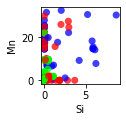

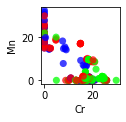

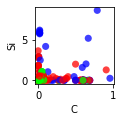

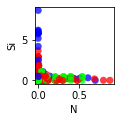

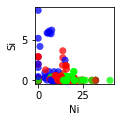

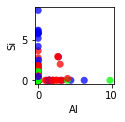

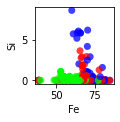

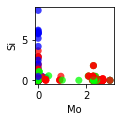

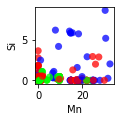

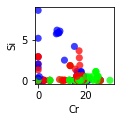

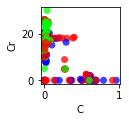

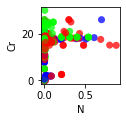

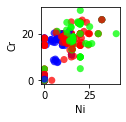

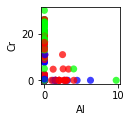

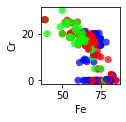

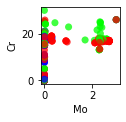

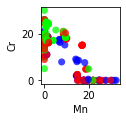

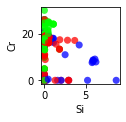

In [21]:
for i in range(1,10):
    for j in range(1,10):
        if (i!=j):
            fig = plt.figure(figsize=(15,15))
            ax = fig.add_subplot(len(SFE_data[1:10]),len(SFE_data[1:10]),(len(SFE_data[1:10])*(i-1))+j)
            ax.scatter(SFE_data[:,j],SFE_data[:,i],c=SFE_classes,marker="o", s=50, edgecolor='',cmap ='brg', alpha=0.75)
            ax.set_xlabel(element_names[j-1])
            ax.set_ylabel(element_names[i-1])
            plt.show()
    

even with the above plottings we can clearly say that the data is non-linear.

In [22]:
# save to csv file
np.savetxt('data_nor.csv', SFE_data[:,:10], delimiter=',')

#normalization and standardization
from sklearn import preprocessing
#normalization = preprocessing.normalize(SFE_data[:,:10], axis=0)
scaler = preprocessing.MinMaxScaler()
normalization = scaler.fit_transform(SFE_data[:,:10])
print(normalization[0])


standardization = preprocessing.scale(SFE_data[:,:10], axis=0)


[0.         0.00416667 0.00340909 0.39       0.         0.55710921
 0.83333333 0.00092166 0.00230681 0.58333333]


Normalization

In [23]:
# import numpy as np
# # read csv file to np
# data_SFE=np.genfromtxt('data_nor.csv',delimiter=',')
# def dataset_MinMax(dataset):
# 	Min_Max = list()
# 	for i in range(len(dataset[0])):
# 		col_val = [row[i] for row in dataset]
# 		Min_val = min(col_val)
# 		Max_val = max(col_val)
# 		Min_Max.append([Min_val, Max_val])
# 	return Min_Max
 
# # Rescaling, or min-max normalization:we scale the data into range: [0,1]
# def normalization(dataset, Min_Max):
# 	for row in dataset:
# 		for i in range(len(row)):
# 			row[i] = (row[i] - Min_Max[i][0]) / (Min_Max[i][1] - Min_Max[i][0])
		
    
 
# Min_Max = dataset_MinMax(data_SFE)
# # Normalize columns
# normalization(data_SFE, Min_Max)
# print(data_SFE[0])

Dimensionality Reduction

We have 9 element compositions(predictor variables) and one SFE class(output variable).so we are using 10 dimensions to visualize everything going on.

So, the dimensionality reduction tehniques (linear & non-linear) tries to reduce 9 dimensional data into 2 or 3 dimensional data while preserving the true patterns in the data as far as possible.


Principal Component Analysis

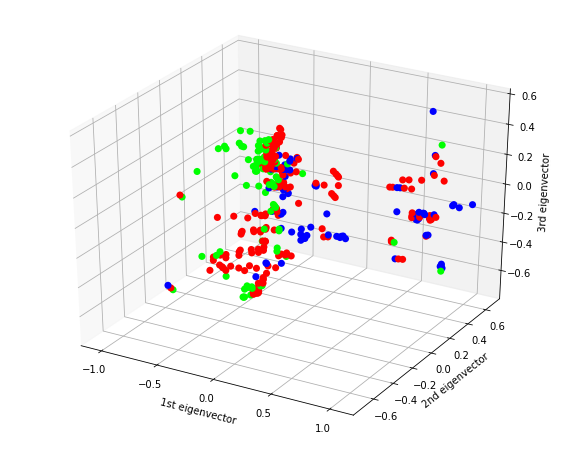

In [24]:
import numpy as np
import math
import matplotlib #scientific plots
import matplotlib.pyplot as plt
#data_SFE=np.genfromtxt('data_nor.csv',delimiter=',')
def PCA(data , n_components):
     #mean- each row w.r.t coloumn
    m = data - np.mean(data , axis = 0)
     #covariance matrix
    cm = np.cov(m , rowvar = False)
     
    #Eigenvalues and Eigenvectors
    eigenvalues , eigenvectors = np.linalg.eigh(cm)
    #linalg.eigh( ) gives eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) or a real symmetric matrix
    #arranging the eigenvalues and eigenvectors in descending order
    arranged_Index = np.argsort(eigenvalues)[::-1]
    arranged_eigenvalues = eigenvalues[arranged_Index]
    arranged_eigenvectors = eigenvectors[:,arranged_Index]
     
    #select the first n eigenvectors, n is desired dimension
    eigenvector_ncom = arranged_eigenvectors[:,0:n_components]
     
   #finally reducing the dimension
    reduced_dim = np.dot(eigenvector_ncom.transpose() , m.transpose() ).transpose()
     
    return reduced_dim
mat_reduced = PCA(normalization , 3)
fig = plt.figure(figsize=(10,8))
#ax = fig.add_subplot(1,2,1, projection='3d')
ax = plt.axes(projection ="3d")
#gs = gridspeci.GridSpec(1, 2,width_ratios=[10,2])
#ax = plt.subplot(gs[0], projection='3d')
#ax2 = plt.subplot(gs[1])


ax.scatter(mat_reduced[:, 0], mat_reduced[:, 1], mat_reduced[:, 2], s=50, c=SFE_classes,  edgecolor='', cmap='brg', depthshade=False)
ax.set_xlabel("1st eigenvector")
#ax.set_xlim(mat_reduced[:,0].min()-0.1,mat_reduced[:,0].max()+0.1)
#ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
#ax.set_ylim(mat_reduced[:,1].min()-0.1,mat_reduced[:,1].max()+0.1)
#ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
#ax.set_zlim(mat_reduced[:,2].min()-0.1,mat_reduced[:,2].max()+0.1)
#ax.w_zaxis.set_ticklabels([])
#ax.view_init(15,120)
#ax.xaxis.pane.set_edgecolor('black')
#ax.yaxis.pane.set_edgecolor('black')
#ax.zaxis.pane.set_edgecolor('black')
#ax.xaxis.pane.fill = False
##ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
blue_patch = mpatches.Patch(color=[0,0,1], label='Low SFE')
red_patch = mpatches.Patch(color=[1,0,0], label='Medium SFE')
green_patch = mpatches.Patch(color=[0,1,0], label='High SFE')
#plt.axis('off')
#ax2.legend(handles=[blue_patch,red_patch,green_patch ], loc='lower right')
plt.show()

findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


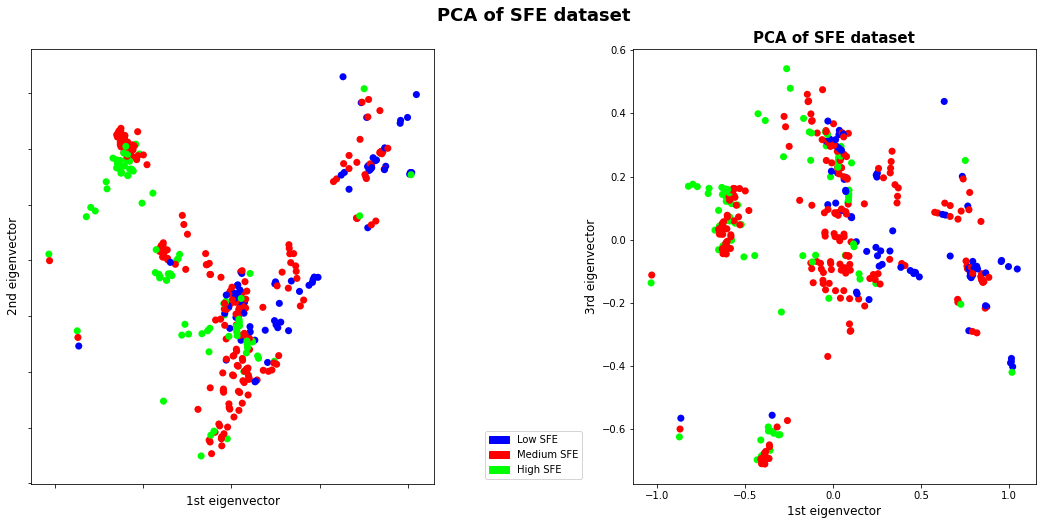

In [25]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(1, 3,width_ratios=[10,2,10])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1],frameon=False)
ax3 = fig.add_subplot(gs[2])

ax1.scatter(mat_reduced[:, 0], mat_reduced[:, 1], s=50, c=SFE_classes, cmap='brg', edgecolor='')
#ax1.set_title("PCA of SFE dataset", fontweight='bold', fontsize=15, fontname='Segoe UI')
ax1.set_xlabel("1st eigenvector", fontsize=12)
ax1.set_xlim(mat_reduced[:,0].min()-0.1,mat_reduced[:,0].max()+0.1)
ax1.xaxis.set_ticklabels([])
ax1.set_ylabel("2nd eigenvector", fontsize=12)
ax1.set_ylim(mat_reduced[:,1].min()-0.1,mat_reduced[:,1].max()+0.1)
ax1.yaxis.set_ticklabels([])

ax3.scatter(mat_reduced[:, 0], mat_reduced[:, 2], s=50, c=SFE_classes, cmap='brg', edgecolor='')
ax3.set_title("PCA of SFE dataset", fontweight='bold', fontsize=15, fontname='Segoe UI')
ax3.set_xlabel("1st eigenvector", fontsize=12)
#ax3.set_xlim(mat_reduced[:,0].min()-0.1,mat_reduced[:,0].max()+0.1)
#ax3.xaxis.set_ticklabels([])
ax3.set_ylabel("3rd eigenvector", fontsize=12)
#ax3.set_ylim(mat_reduced[:,2].min()-0.1,mat_reduced[:,2].max()+0.1)
#ax3.yaxis.set_ticklabels([])

#blue_patch = mpatches.Patch(color=[0,0,1], label='Low SFE')
#red_patch = mpatches.Patch(color=[1,0,0], label='Medium SFE')
#green_patch = mpatches.Patch(color=[0,1,0], label='High SFE')

ax2.set_title("PCA of SFE dataset", fontweight='heavy', fontsize=18)
ax2.title.set_position([0.5,1.05])
ax2.legend(handles=[blue_patch,red_patch,green_patch ], loc='lower center')
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

#plt.savefig('PCA2.png',dpi=500)
plt.show()

we can find a pattern from this 2d images from the above mixed classes obtained from PCA.

In [26]:
#Let's add markers to the plots to understand better.
#Image(filename='PCA_boundaries.png')

we can see that for values <~-0.25 we only have low and Medium SFE values. For value >~0.1 we have high and medium SFE

In [27]:
#Lets print and check the values
#checkarray = np.where((X_pca3[:,0]>0.1))
#print(data_red4[[0,1,2,3,4,5,6,7,8,9]].iloc[checkarray])
#pca3_m=pd.DataFrame(data=X_pca3, columns = ["e1","e2","e3"]) # the values in the 3 components
#pca3_m.head()


Multidimensional Scaling

findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


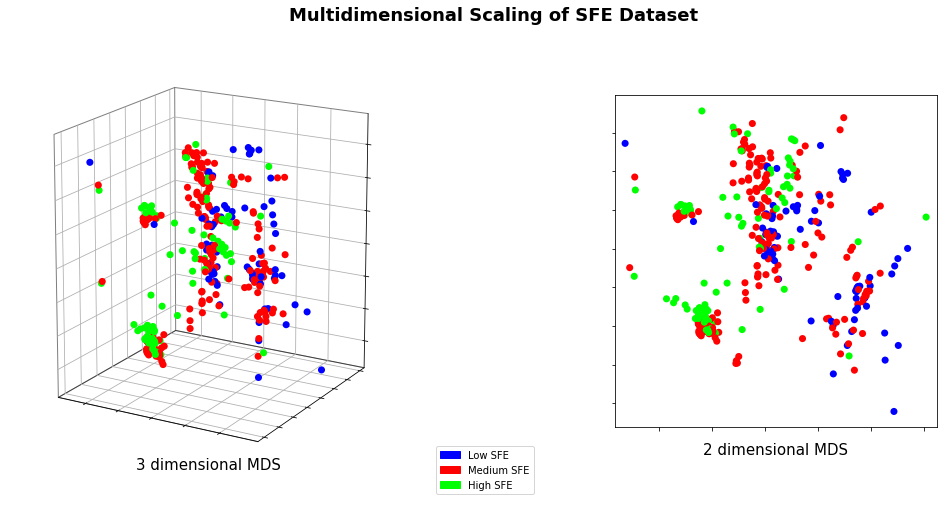

In [28]:
from sklearn import manifold
import matplotlib.gridspec as gridspec


mds3Norm = manifold.MDS(n_components=3, eps = 1e-6, n_init = 3, random_state = 20)
mds3NormY = mds3Norm.fit_transform(normalization)

mds2Norm = manifold.MDS(n_components=2, eps = 1e-6, n_init = 3, random_state = 20)
mds2NormY = mds2Norm.fit_transform(normalization)

fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(20, 5,width_ratios=[10,2,.5,8,1])
fig.suptitle("Multidimensional Scaling of SFE Dataset", fontweight='bold', fontsize=18, fontname='Segoe UI')
plt.subplots_adjust(top=.95)

ax1 = plt.subplot(gs[:20,0], projection='3d')
ax2 = plt.subplot(gs[:20,1],frameon=False)
ax3 = plt.subplot(gs[3:17,3])

ax1.scatter( mds3NormY[:, 0], mds3NormY[:, 1], mds3NormY[:, 2], c = SFE_classes, s =50,  edgecolor='', depthshade=False, cmap='brg')
ax1.set_title("3 dimensional MDS", fontweight='normal', fontsize=15, fontname='Segoe UI')
ax1.title.set_position([0.5,0.05])
ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())
ax1.zaxis.set_major_formatter(NullFormatter())
ax1.view_init(15,120)
ax1.xaxis.pane.set_edgecolor('black')
ax1.yaxis.pane.set_edgecolor('black')
ax1.zaxis.pane.set_edgecolor('black')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False



ax3.scatter( mds2NormY[:, 0], mds2NormY[:, 1], c = SFE_classes, s =50,  edgecolor='', cmap='brg')
ax3.set_xlim(mds2NormY[:,0].min()-0.1,mds2NormY[:,0].max()+0.1)
ax3.set_ylim(mds2NormY[:,1].min()-0.1,mds2NormY[:,1].max()+0.1)
ax3.set_title("2 dimensional MDS", fontweight='normal', fontsize=15, fontname='Segoe UI')
ax3.title.set_position([0.5,-0.1])
ax3.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())
#ax3.zaxis.set_major_formatter(NullFormatter())
#fig.colorbar(cax)

blue_patch = mpatches.Patch(color=[0,0,1], label='Low SFE')
red_patch = mpatches.Patch(color=[1,0,0], label='Medium SFE')
green_patch = mpatches.Patch(color=[0,1,0], label='High SFE')

#ax2.set_title("Multidimensional Scaling of SFE dataset", fontweight='heavy', fontsize=18, fontname='Segoe UI')
ax2.title.set_position([0.5,1.05])
ax2.legend(handles=[blue_patch,red_patch,green_patch ], loc='lower center')
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

#plt.savefig('MDS.png',dpi=500)
plt.show()

findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


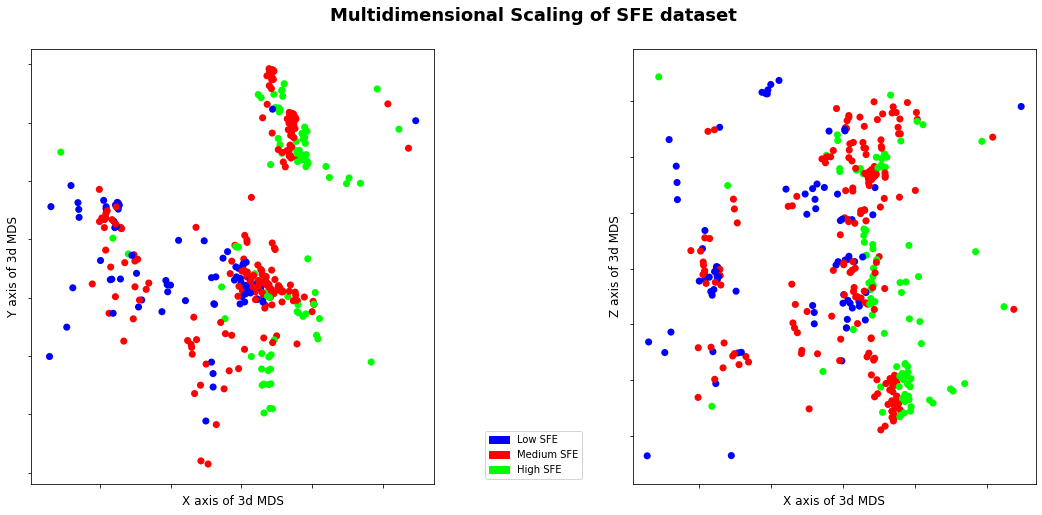

In [29]:
fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(10, 3,width_ratios=[10,2,10])
#fig.suptitle("Multidimensional Scaling of SFE Dataset", fontweight='bold', fontsize=18, fontname='Segoe UI')
#plt.subplots_adjust(top=.95)

ax1 = plt.subplot(gs[:10,0])
ax2 = plt.subplot(gs[:10,1],frameon=False)
ax3 = plt.subplot(gs[:10,2])

ax1.scatter( mds3NormY[:, 0], mds3NormY[:, 1], c = SFE_classes, s =50,  edgecolor='', cmap='brg')
ax1.set_xlabel("X axis of 3d MDS", fontsize=12)
ax1.set_ylabel("Y axis of 3d MDS", fontsize=12)
ax3.set_xlim(mds3NormY[:,0].min()-0.1,mds3NormY[:,0].max()+0.1)
ax3.set_ylim(mds3NormY[:,1].min()-0.1,mds3NormY[:,1].max()+0.1)
#ax1.set_title("3 dimensional view", fontweight='normal', fontsize=15, fontname='Segoe UI')
#ax1.title.set_position([0.5,0.05])
ax1.xaxis.set_major_formatter(NullFormatter())
ax1.yaxis.set_major_formatter(NullFormatter())




ax3.scatter( mds3NormY[:, 0], mds3NormY[:, 2], c = SFE_classes, s =50,  edgecolor='', cmap='brg')
ax3.set_xlabel("X axis of 3d MDS", fontsize=12)
ax3.set_ylabel("Z axis of 3d MDS", fontsize=12)
ax3.set_xlim(mds3NormY[:,0].min()-0.1,mds3NormY[:,0].max()+0.1)
ax3.set_ylim(mds3NormY[:,2].min()-0.1,mds3NormY[:,2].max()+0.1)
#ax3.set_title("2 dimensional view", fontweight='normal', fontsize=15, fontname='Segoe UI')
#ax3.title.set_position([0.5,-0.1])
ax3.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())
#ax3.zaxis.set_major_formatter(NullFormatter())
#fig.colorbar(cax)

blue_patch = mpatches.Patch(color=[0,0,1], label='Low SFE')
red_patch = mpatches.Patch(color=[1,0,0], label='Medium SFE')
green_patch = mpatches.Patch(color=[0,1,0], label='High SFE')

ax2.set_title("Multidimensional Scaling of SFE dataset", fontweight='heavy', fontsize=18, fontname='Segoe UI')
ax2.title.set_position([0.5,1.05])
ax2.legend(handles=[blue_patch,red_patch,green_patch ], loc='lower center')
ax2.xaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

#plt.savefig('MDS2.png',dpi=500)
plt.show()


we can see that multidimensional scaling plots are similar to principal component analysis

Locally Linear Embedding

In [30]:
# n_neighbors = 20

# #NormElements = arraynorm(Elements[:,1:],0)
# norm_lle=scaler.fit_transform(SFE_data[:,1:10])
# LLEY_3 = manifold.LocallyLinearEmbedding(n_neighbors, n_components=3,
#                                         eigen_solver='dense',
#                                         method='modified').fit_transform(norm_lle)

# LLEY_2 = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                         eigen_solver='dense',
#                                         method='modified').fit_transform(norm_lle)

# fig = plt.figure(figsize=(18,8))
# gs = gridspec.GridSpec(10, 5,width_ratios=[10,2,.5,8,1])
# fig.suptitle("Locally Linear Embedding of SFE Dataset", fontweight='bold', fontsize=18, fontname='Segoe UI')
# plt.subplots_adjust(top=.95)

# ax1 = plt.subplot(gs[:10,0], projection='3d')
# ax2 = plt.subplot(gs[:10,1],frameon=False)
# ax3 = plt.subplot(gs[2:8,3])

# ax1.scatter( LLEY_3[:, 0], LLEY_3[:, 1], LLEY_3[:, 2], c = SFE_classes, s =50,  edgecolor='', depthshade=False, cmap='brg')
# ax1.set_title("3 dimensional view", fontweight='normal', fontsize=15, fontname='Segoe UI')
# ax1.title.set_position([0.5,0.05])
# ax1.set_xlim(LLEY_3[:,0].min()-0.01,LLEY_3[:,0].max()+0.01)
# ax1.set_ylim(LLEY_3[:,1].min()-0.01,LLEY_3[:,1].max()+0.01)
# ax1.set_ylim(LLEY_3[:,2].min()-0.01,LLEY_3[:,2].max()+0.01)
# #ax1.xaxis.set_major_formatter(NullFormatter())
# #ax1.zaxis.set_major_formatter(NullFormatter())
# #ax1.view_init(15,120)
# ax1.xaxis.pane.set_edgecolor('black')
# ax1.yaxis.pane.set_edgecolor('black')
# ax1.zaxis.pane.set_edgecolor('black')
# ax1.xaxis.pane.fill = False
# ax1.yaxis.pane.fill = False
# ax1.zaxis.pane.fill = False



# ax3.scatter(LLEY_2[:, 0], LLEY_2[:, 1], c = SFE_classes, s =50,  edgecolor='', cmap='brg')
# ax3.set_xlim(LLEY_2[:,0].min()-0.01,LLEY_2[:,0].max()+0.01)
# ax3.set_ylim(LLEY_2[:,1].min()-0.01,LLEY_2[:,1].max()+0.01)
# ax3.set_title("2 dimensional view", fontweight='normal', fontsize=15, fontname='Segoe UI')
# ax3.title.set_position([0.5,-0.1])
# #ax3.xaxis.set_major_formatter(NullFormatter())
# #ax3.yaxis.set_major_formatter(NullFormatter())
# #ax3.zaxis.set_major_formatter(NullFormatter())
# #fig.colorbar(cax)

# blue_patch = mpatches.Patch(color=[0,0,1], label='Low SFE')
# red_patch = mpatches.Patch(color=[1,0,0], label='Medium SFE')
# green_patch = mpatches.Patch(color=[0,1,0], label='High SFE')

# #ax2.set_title("Multidimensional Scaling of SFE dataset", fontweight='heavy', fontsize=18, fontname='Segoe UI')
# #ax2.title.set_position([0.5,1.05])
# ax2.legend(handles=[blue_patch,red_patch,green_patch ], loc='lower center')
# #ax2.xaxis.set_major_formatter(plt.NullFormatter())
# #ax2.yaxis.set_major_formatter(plt.NullFormatter())
# ax2.axes.get_xaxis().set_visible(False)
# ax2.axes.get_yaxis().set_visible(False)

# #plt.savefig('LLE.png',dpi=500)
# plt.show()


Classification

In [77]:
master_indices = np.arange(normalization.shape[0])
print('master indices shape : ', master_indices.shape)
#choosing test set and corressponding training set
np.random.seed(25)
test_prop = 0.2
test_indices = np.random.choice(normalization.shape[0],int(math.floor(test_prop*normalization.shape[0])),replace = False)
test_x = normalization[test_indices]
test_y = SFE_classes[test_indices]

train_indices = master_indices
print('train indices shape :', train_indices.shape)
for item in test_indices:
    train_indices = np.delete(train_indices,np.where(train_indices==item))
print('train indices shape  :', train_indices.shape)

train_x = normalization[train_indices]
train_y = SFE_classes[train_indices]
print(test_x.shape)
print(test_y.shape)
print(train_x.shape)
print(train_y.shape)
#print(test_x[0])
#from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
#train_x, test_x, train_y, test_y = train_test_split(normalization, SFE_classes, test_size=0.2,random_state=25) # 70% training and 20% test
#print('train indices shape  :', train_x.shape)

master indices shape :  (374,)
train indices shape : (374,)
train indices shape  : (300,)
(74, 10)
(74,)
(300, 10)
(300,)


In [35]:
print("1",(SFE_classes[train_indices,]==1).sum(),np.true_divide((SFE_classes[train_indices,]==1).sum(),300))
print("2",(SFE_classes[train_indices,]==2).sum(),np.true_divide((SFE_classes[train_indices,]==2).sum(),300))
print("3",(SFE_classes[train_indices,]==3).sum(),np.true_divide((SFE_classes[train_indices,]==3).sum(),300))


1 59 0.19666666666666666
2 167 0.5566666666666666
3 74 0.24666666666666667


In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#iterating over hyperparameters to select the best for our model
C_range = np.logspace(-2, 10, 10, base=2)
gamma_range = np.logspace(-9, 1, 5, base=2)
k_options = ['linear','poly','rbf']
params_grids = dict(gamma=gamma_range, C=C_range, kernel=k_options)
grid = GridSearchCV(SVC(), param_grid=params_grids, cv=30, n_jobs=10)
grid.fit(train_x,train_y)

print(grid.best_params_)
#grid.grid_scores_


{'C': 0.6299605249474366, 'gamma': 2.0, 'kernel': 'poly'}


In [37]:
#training the model
clf_svc= SVC(kernel= 'poly', C= 0.62, gamma = 2.0, random_state=25)
clf_svc.fit(train_x, train_y)
predict_y_svc = clf_svc.predict(test_x)

#testing model
from sklearn import metrics
model_score = clf_svc.score(test_x, test_y)
print ("Model Score for SVM on actual Data %.2f \n" % (model_score))

train_score = clf_svc.score(train_x, train_y)
print ("Model Score for SVM on training Data %.2f \n" % (train_score))


Model Score for SVM on actual Data 0.84 

Model Score for SVM on training Data 0.86 



In [38]:
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(test_y,predict_y_svc)
print("Confusion Matrix \n",confusion_matrix(test_y,predict_y_svc),"\n")

from sklearn.metrics import precision_score
print ("Precision scores across classes: ", precision_score(test_y,predict_y_svc,average=None), "\n")

from sklearn.metrics import recall_score
print ("Recall scores across classes: ",recall_score(test_y,predict_y_svc,average=None), "\n")

from sklearn.metrics import precision_score
print ("Macro Precision Score: ",precision_score(test_y,predict_y_svc,average='macro'), "\n")

from sklearn.metrics import recall_score
print ("Macro Recall Score: ",recall_score(test_y,predict_y_svc,average='macro'), "\n")

Confusion Matrix 
 [[12  6  0]
 [ 0 40  2]
 [ 1  3 10]] 

Precision scores across classes:  [0.92307692 0.81632653 0.83333333] 

Recall scores across classes:  [0.66666667 0.95238095 0.71428571] 

Macro Precision Score:  0.8575789290075004 

Macro Recall Score:  0.7777777777777778 



In [39]:
#getting percentage values for confusion matrix
np.true_divide(cm_svc,74)*100

array([[16.21621622,  8.10810811,  0.        ],
       [ 0.        , 54.05405405,  2.7027027 ],
       [ 1.35135135,  4.05405405, 13.51351351]])

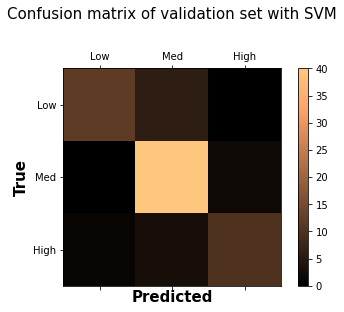

In [40]:

labels = ['Low', 'Med', 'High']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_svc, cmap=plt.get_cmap('copper'))
ax.set_title('Confusion matrix of validation set with SVM', fontsize=15, x=0.5, y=1.2)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted', fontsize=15, fontweight = 'bold')
plt.ylabel('True', fontsize=15,  fontweight = 'bold')
plt.savefig("CM_SVC.png",format ='png', dpi=500, bbox_inches='tight',orientation='landscape')
plt.show()

Artificial Neural Networks -  Here we are using one layer neural network, logistic regression.

In [78]:
train_x = train_x.T
print(train_x.shape)
train_y=train_y.T
train_y = train_y.reshape(1, train_x.shape[1])
print(train_y.shape)

test_x = test_x.T
print(test_x.shape)
test_y=test_y.T
test_y = test_y.reshape(1, test_x.shape[1])
print(test_y.shape)



(10, 300)
(1, 300)
(10, 74)
(1, 74)


Sigmoid

In [79]:
def sigmoid(z):
    
    s=1/(1+np.exp(-z))

    
    return s

GRADED FUNCTION: initialize_with_zeros

In [80]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    
    w=np.zeros((dim,1))
    b=0.0
    
    return w, b

FORWARD PROPAGATION and BACKWARD PROPAGATION

In [81]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T, X) + b) 
    cost=-1/m *np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw=(1/m)*(np.dot(X,(A-Y).T))
    db=(1/m)*np.sum(A-Y)
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

Optimization

In [82]:
# GRADED FUNCTION: optimize
import copy
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)
        
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w=w-learning_rate*dw
        b=b-learning_rate*db
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

predict

In [83]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A=sigmoid(np.dot(w.T,X)+b)
    
    # YOUR CODE ENDS HERE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        if A[0, i] > 0.5 :
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        
        # YOUR CODE ENDS HERE
    
    return Y_prediction

In [92]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)   
    # initialize parameters with zeros 
    # w, b = ...
    w, b = initialize_with_zeros(X_train.shape[0])
    #(≈ 1 line of code)
    # Gradient descent 
    # params, grads, costs = ...
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations=100, learning_rate=0.009, print_cost=False)
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    w=params["w"]
    b=params["b"]
    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # YOUR CODE STARTS HERE
    Y_prediction_test =predict(w, b, X_test)
    Y_prediction_train=predict(w, b, X_train)

    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [93]:
logistic_regression_model = model(train_x, train_y, test_x, test_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

train accuracy: -5.0 %
test accuracy: 5.4054054054054035 %


other try

In [89]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def model(X, Y, learning_rate, iterations):
    
    m = train_x.shape[1]
    n = train_x.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(train_x, train_y, learning_rate = learning_rate, iterations = iterations)
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")
accuracy(test_x, test_y, W, B)
      

cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  -inf
cost after  20000 iteration is :  nan
cost after  30000 iteration is :  nan
cost after  40000 iteration is :  nan
cost after  50000 iteration is :  nan
cost after  60000 iteration is :  nan
cost after  70000 iteration is :  nan
cost after  80000 iteration is :  nan
cost after  90000 iteration is :  nan
Accuracy of the model is :  5.41 %
